### Könyvtárak importálása

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### X-ek és hozzájuk tartozó exponenciális y-ok generálása

In [30]:
X = np.linspace(start=1, stop=5, num=1000)
y = []
for i in range(1000):
    rnd = np.random.randint(0, 2)
    rand = 1 + np.random.random()
    if(rnd == 0):
        y.append(np.exp(X[i])*rand)
    else:
        y.append(np.exp(X[i])*rand)

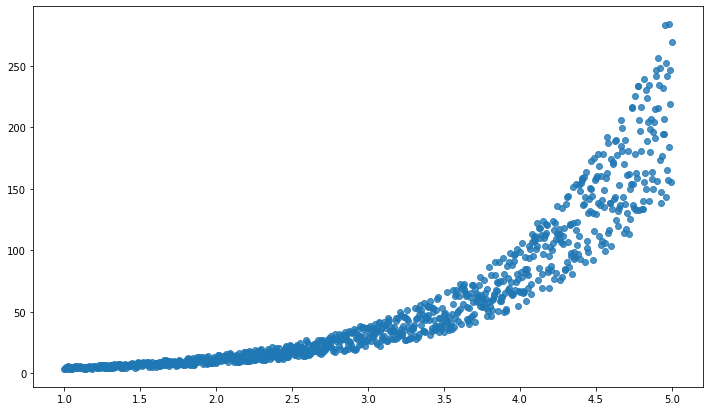

In [80]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

### X-ekből exp(X)-ek készítése - exp_X

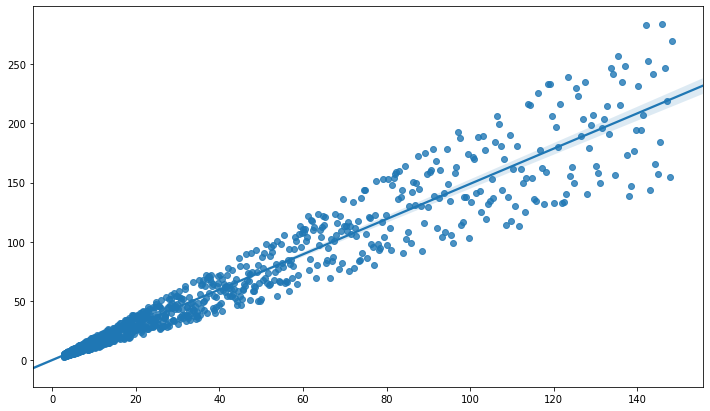

In [83]:
exp_X = np.exp(X)

plt.figure(figsize=(12, 7))
sns.regplot(x=exp_X, y=y) #exp(X), y

In [85]:
stats.linregress(np.exp(X), y)

LinregressResult(slope=1.4879038618447624, intercept=0.07024674121549168, rvalue=0.9650834894735597, pvalue=0.0, stderr=0.012783525300160373)

### exp(X), y-hoz tartozó egyenes együtthatói

#### B1 értéke

In [33]:
számláló = 0
nevező = 0

for a, b in zip(exp_X, y):
    számláló += (a-np.mean(exp_X))*(b-np.mean(y))  #B1 számlálója:  SUM[ (Xi - X_átlag)*(Yi-Y_átlag) ]
    nevező += (a-np.mean(exp_X))**2                #B1 nevezője:   (Xi-X_átlag)**2
    
B1 = számláló/nevező
print('B1: ', B1)

B1:  1.4879038618447624


#### B0 értéke

In [34]:
B0 = np.mean(y)-B1*np.mean(exp_X)                 #B0: Y_átlag - B1*Xátlag
print('B0: ', B0)

B0:  0.07024674121549168


### exp(X), y-hoz tartozó egyenes ábrázolása

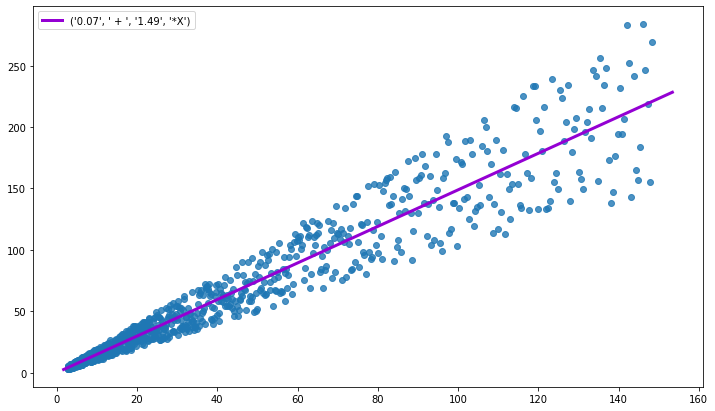

In [90]:
plt.figure(figsize=(12, 7))
plt.scatter(exp_X, y, alpha=0.8)

vonal_x = np.linspace(np.min(exp_X)-1, np.max(exp_X)+5, 2)
vonal_y = (B0 + B1*vonal_x)

plt.plot(vonal_x, vonal_y, c='darkviolet', linewidth=3, label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), '*X'))
plt.legend()
plt.show()

### Exponenciális görbe ábrázolása Y = B0*(B1^X)

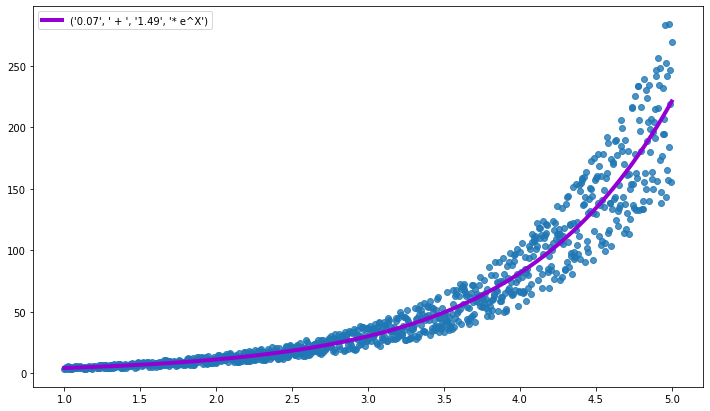

In [92]:
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.8)

plt.plot(X, B0 + B1*np.exp(X), c='darkviolet', linewidth=4, label=('{0:.2f}'.format(B0),' + ','{0:.2f}'.format(B1), '* e^X')) #Y = B0 + log(B1*X)
plt.legend()

plt.show()

### Prediction

In [76]:
def exp_predict(x):
    return B0 + B1*np.exp(x)

exp_predict(3)

29.95559469645199

### R^2

In [78]:
from sklearn.metrics import r2_score

yexp_predicted = list(map(exp_predict, X))
print('R^2: ', r2_score(y, yexp_predicted)) #(tényleges, predicted)

R^2:  0.9313861416544624


###   
###   
### Másik módszer - scipy curve_fit

In [96]:
from scipy.optimize import curve_fit 

def exp(x, a, b): 
    return a*np.exp(b*x) 
  
param, param_cov = curve_fit(exp, X, y)

print('B0: ', param[0])
print('B1: ', param[1])

B0:  1.5338116792943228
B1:  0.9933894480022978


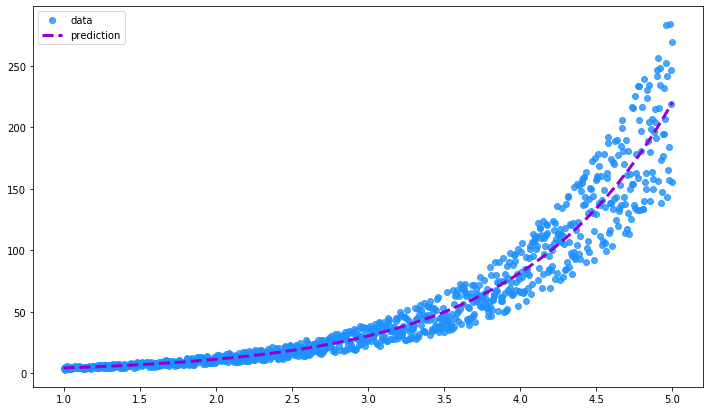

In [95]:
ans = (param[0]*(np.exp(param[1]*X)))

plt.figure(figsize=(12, 7))
plt.plot(X, y, 'o', color ='dodgerblue', label ="data", alpha=0.8)
plt.plot(X, ans, '--', color ='darkviolet',linewidth=3, label ="prediction")

plt.legend()
plt.show()